In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [48]:
data= pd.read_csv('TrustPilot_Cleaned_Doc_Term_With_Sentiment.csv')
data.drop(columns=['UID'], inplace= True)
data['Sentiment']= data['Sentiment'].apply(lambda x: 1 if x=="Postitive" else 0)
data.head()

,able,absolutely,accept,accepted,account,actually,add,address,advance,ago,...,worse,worst,worth,would,wrong,year,yesterday,yet,zero,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.263133,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.108582,0.0,0.0,0.0,0.0,0.0,0


In [49]:
# Split data into train and test sets (70% train, 30% test)
X = data.drop("Sentiment", axis=1)  # All columns except "Sentiment"
y = data["Sentiment"]  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)


In [50]:
# Define the model
model = keras.Sequential([
  # First hidden layer with 32 neurons and ReLU activation
  layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),

  # Second hidden layer with 16 neurons and ReLU activation
  layers.Dense(16, activation="relu"),

  # Output layer with 1 neuron and sigmoid activation for binary classification
  layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

# Train the model using the NumPy arrays
model.fit(X_train_array, y_train_array, epochs=10, batch_size=32)


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_array, y_test_array)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
132/132 [==============================] - 2s 3ms/step - loss: 0.4683 - accuracy: 0.8477
Epoch 2/10
132/132 [==============================] - 1s 4ms/step - loss: 0.1892 - accuracy: 0.9375
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 0.1534 - accuracy: 0.9485
Epoch 4/10
132/132 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9515
Epoch 5/10
132/132 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9575
Epoch 6/10
132/132 [==============================] - 1s 11ms/step - loss: 0.1202 - accuracy: 0.9596
Epoch 7/10
132/132 [==============================] - 1s 6ms/step - loss: 0.1129 - accuracy: 0.9622
Epoch 8/10
132/132 [==============================] - 1s 7ms/step - loss: 0.1073 - accuracy: 0.9653
Epoch 9/10
132/132 [==============================] - 1s 7ms/step - loss: 0.1001 - accuracy: 0.9686
Epoch 10/10
57/57 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9241


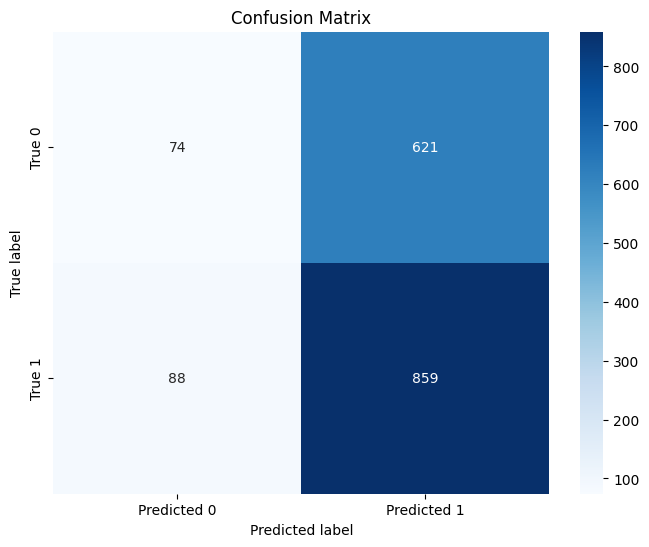

In [47]:
y_pred = model.predict_classes(X_test_array)  # Predict class labels (0 or 1)

cm = confusion_matrix(y_test_array, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
